In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df= pd.read_csv("desktop/data/dummy_data.csv")
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


In [3]:
df.describe()

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


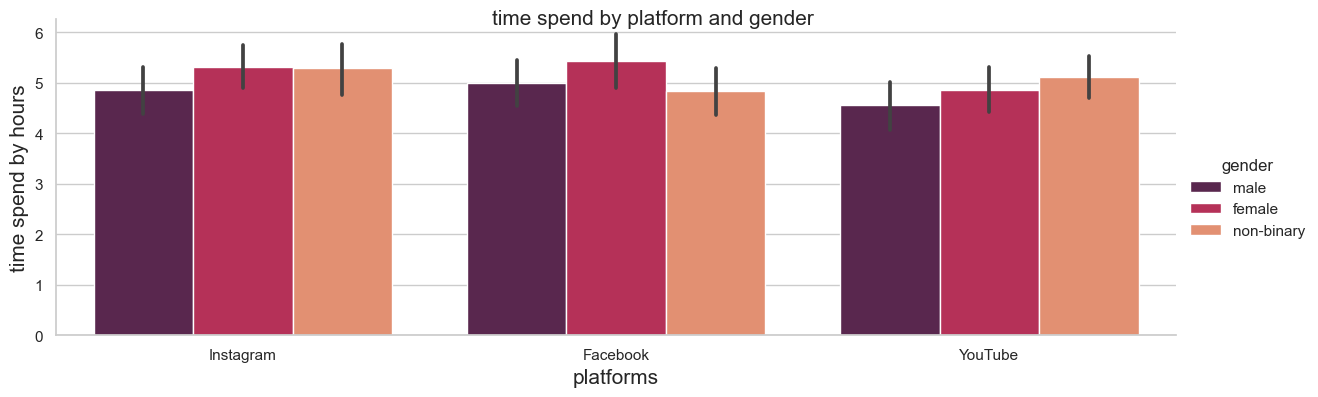

In [4]:
sns.set(style='whitegrid')
sns.catplot(x = 'platform', y = 'time_spent', hue = 'gender', kind = 'bar', height = 4, aspect = 3,
            palette = "rocket",
            data = df).fig.suptitle("time spend by platform and gender",fontsize=15);
plt.xlabel('platforms', fontsize=15)
plt.ylabel('time spend by hours', fontsize=15)
plt.show()

In [5]:
hight_income = df[df['income'] > 14000]
low_income = df[df['income'] < 14000]
h=hight_income.time_spent.mean()
l=low_income.time_spent.mean()
print("the avarage time spending in social media for pepole with high income is " , h)
print("the avarage time spending in social media for pepole with low income is " , l)

the avarage time spending in social media for pepole with high income is  5.05804311774461
the avarage time spending in social media for pepole with low income is  4.984886649874055


In [6]:
timespent_inteset = df.groupby("interests").time_spent.mean().reset_index().sort_values(by = "time_spent", ascending= False)
timespent_inteset

,interests,time_spent
0,Lifestlye,5.143695
2,Travel,5.094512
1,Sports,4.845921


In [7]:
prof_income = df.groupby("profession").income.mean().reset_index().sort_values(by = "income", ascending= False)
prof_income

,profession,income
2,Student,15265.731392
0,Marketer Manager,14927.335211
1,Software Engineer,14876.511905


In [8]:
People_stu_time_spent = df.groupby(["indebt","isHomeOwner","Owns_Car"]).time_spent.mean().reset_index().sort_values(by = "time_spent", ascending= False)
People_stu_time_spent

,indebt,isHomeOwner,Owns_Car,time_spent
2,False,True,False,5.247934
7,True,True,True,5.169118
4,True,False,False,5.116071
6,True,True,False,5.000000
3,False,True,True,4.992000
0,False,False,False,4.960784
5,True,False,True,4.959350
1,False,False,True,4.825806


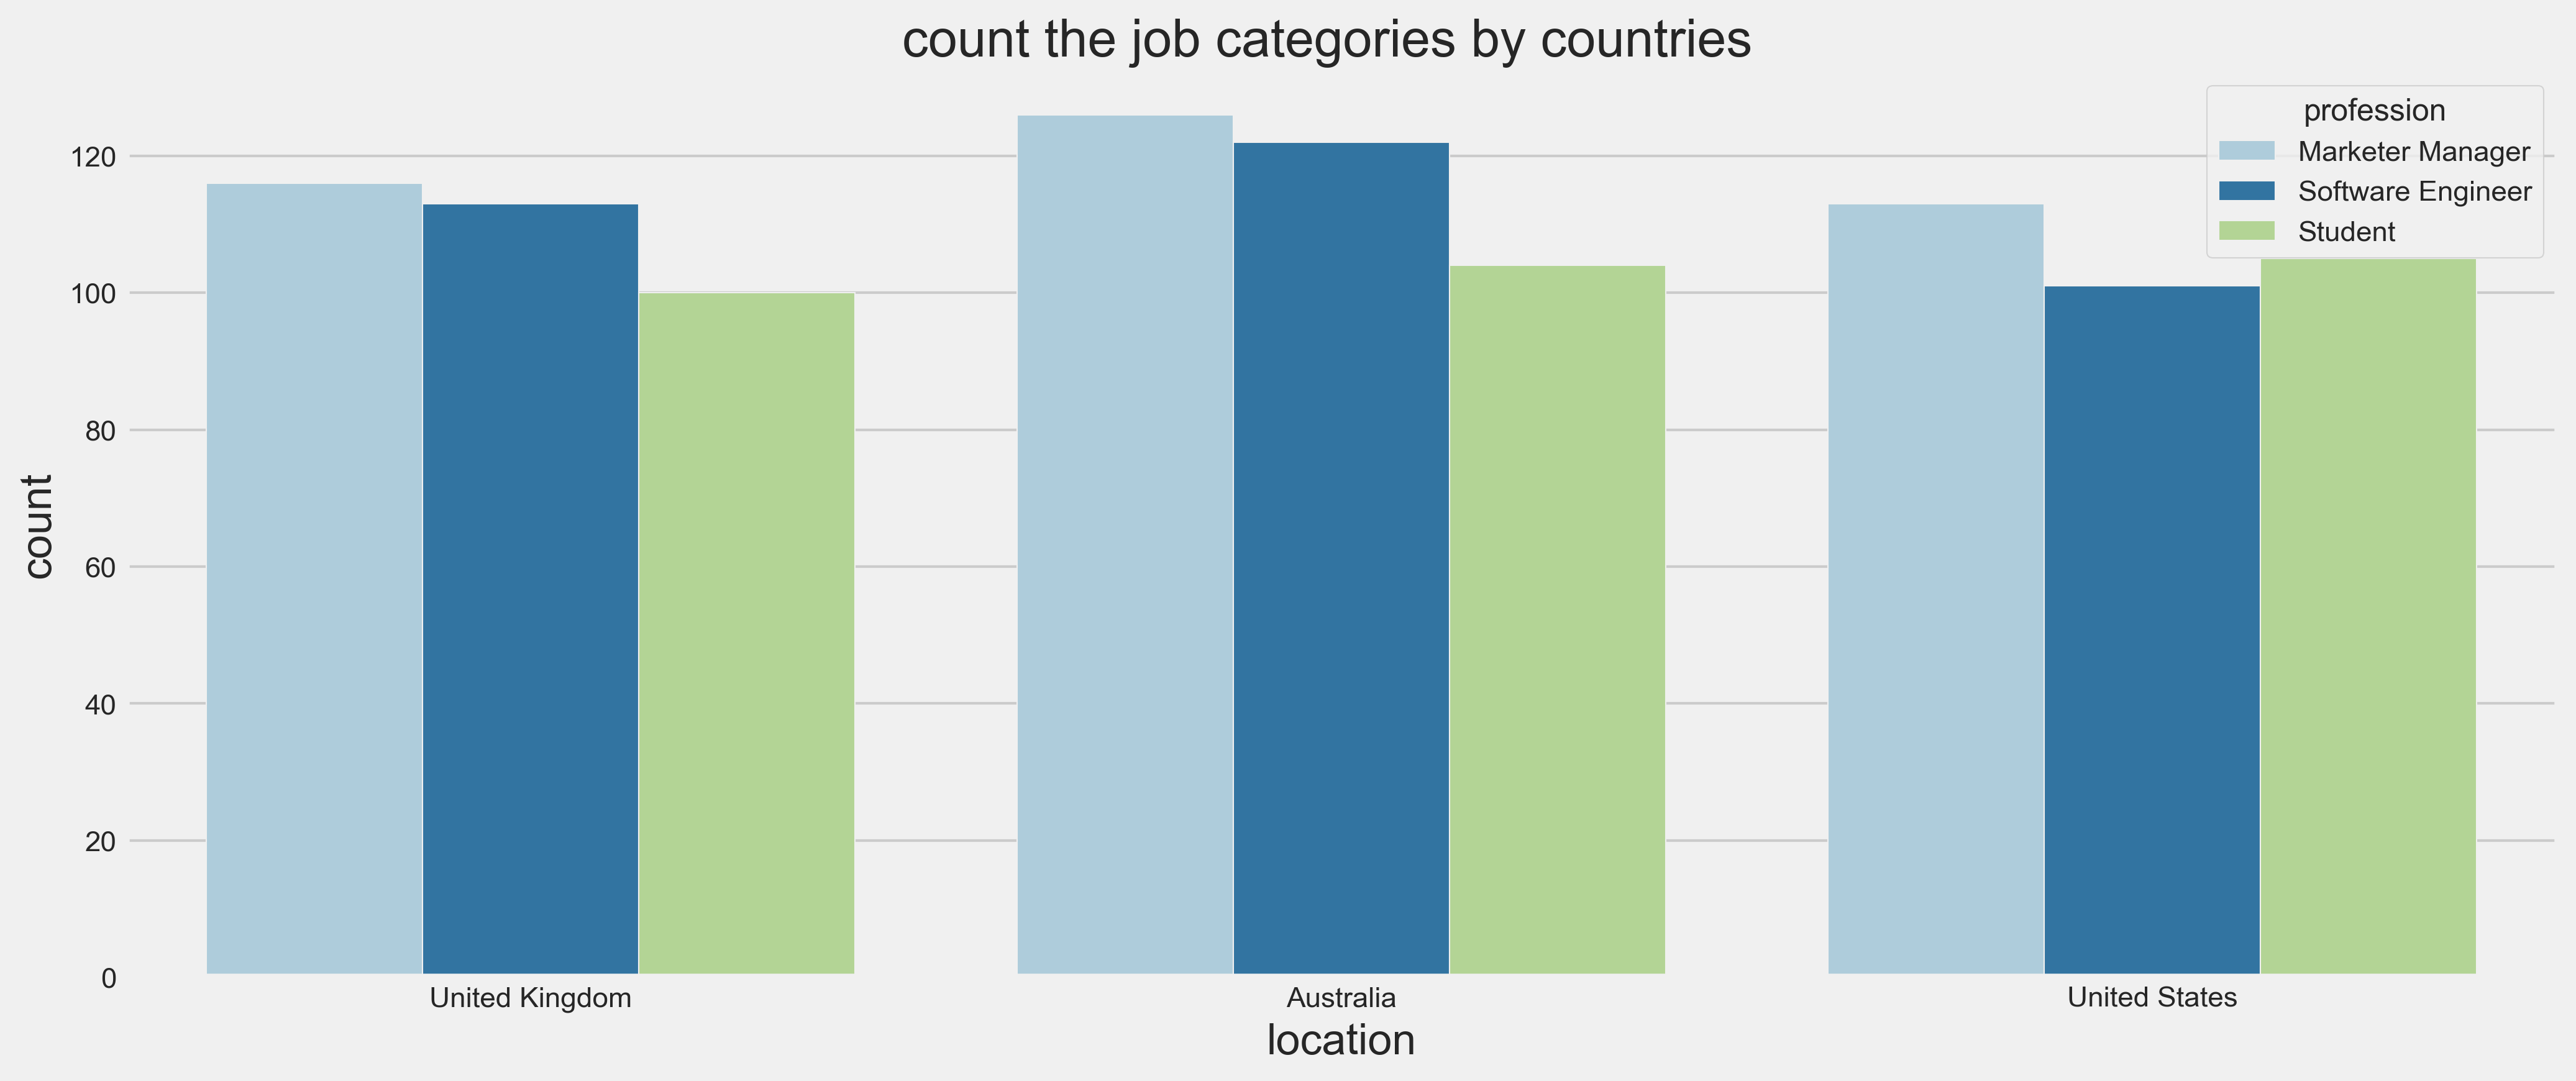

In [10]:
with plt.style.context('fivethirtyeight'):
    sns.set_palette("Paired")
    
    plt.figure(figsize=(15, 6), dpi=300)
    sns.countplot(x= 'location', 
                  hue="profession",
                  hue_order=df["profession"].value_counts().index, 
                  data=df,
                 palette = "Paired")
    plt.title("count the job categories by countries  ")
    plt.show()